# Matplotlib - 2D and 3D plotting in Python

## Introduction

Matplotlib is an excellent 2D and 3D graphics library for generating scientific figures. Some of the many advantages of this library include:

* Easy to get started
* Great control of every element in a figure, including figure size and DPI. 
* High-quality output in many formats, including PNG, PDF, SVG, EPS, and PGF.
* GUI for interactively exploring figures *and* support for headless generation of figure files (useful for batch jobs).

One of the key features of matplotlib that I would like to emphasize, and that I think makes matplotlib highly suitable for generating figures for scientific publications is that all aspects of the figure can be controlled *programmatically*. This is important for reproducibility and convenient when one needs to regenerate the figure with updated data or change its appearance. 

More information at the Matplotlib web page: http://matplotlib.org/

or import the `matplotlib.pyplot` module under the name `plt` (the tidy way):

In [22]:
import matplotlib
import matplotlib.pyplot as plt

In [23]:
import numpy as np

## MATLAB-like API

### Example

A simple figure with MATLAB-like plotting API:

In [24]:
x = np.linspace(0, 5, 10)
y = x ** 2

Text(0, 0.5, 'y')

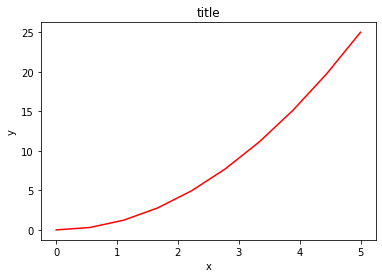

In [25]:
plt.plot(x,y,'r')
plt.title('title')
plt.xlabel('x')
plt.ylabel('y')

Most of the plotting related functions in MATLAB are covered by the `pylab` module. For example, subplot and color/symbol selection:

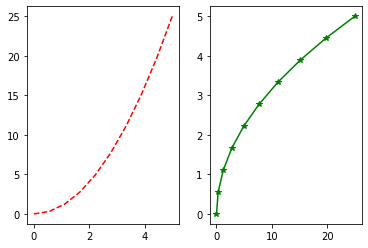

In [26]:
plt.subplot(121)
plt.plot(x,y,'r--')
plt.subplot(122)
plt.plot(y,x,'g*-')

The good thing about the pylab MATLAB-style API is that it is easy to get started with if you are familiar with MATLAB, and it has a minumum of coding overhead for simple plots. 

However, I'd encourrage not using the MATLAB compatible API for anything but the simplest figures.

Instead, I recommend learning and using matplotlib's object-oriented plotting API. It is remarkably powerful. For advanced figures with subplots, insets and other components it is very nice to work with. 

## The matplotlib object-oriented API

The main idea with object-oriented programming is to have objects that one can apply functions and actions on, and no object or program states should be global (such as the MATLAB-like API). The real advantage of this approach becomes apparent when more than one figure is created, or when a figure contains more than one subplot. 

To use the object-oriented API we start out very much like in the previous example, but instead of creating a new global figure instance we store a reference to the newly created figure instance in the `fig` variable, and from it we create a new axis instance `axes` using the `add_axes` method in the `Figure` class instance `fig`:

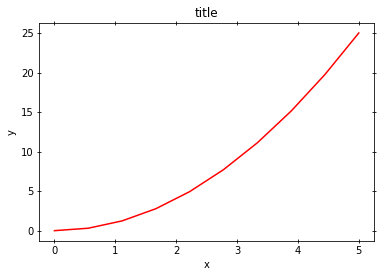

In [27]:
plt.plot(x,y,'r')
plt.title('title')
plt.xlabel('x')
plt.ylabel('y')
plt.tick_params(top='on',right='on',which='both',direction='inout')

Although a little bit more code is involved, the advantage is that we now have full control of where the plot axes are placed, and we can easily add more than one axis to the figure:

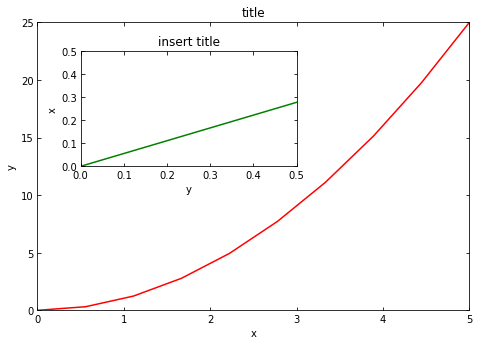

In [28]:
fig1=plt.figure()
ax1=fig1.add_axes([0,0,1,1])
ax2=fig1.add_axes([0.1,0.5,0.5,0.4])
ax1.plot(x,y,'r')
ax1.set_title('title')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_xlim(0,5)
ax1.set_ylim(0,25)
ax1.tick_params(top='on',right='on',which='both',direction='in')
ax2.plot(x,y,'g')
ax2.set_title('insert title')
ax2.set_xlabel('y')
ax2.set_ylabel('x')
ax2.set_xlim(0,0.5)
ax2.set_ylim(0,0.5)
ax2.tick_params(top='on',right='on',which='both',direction='in')


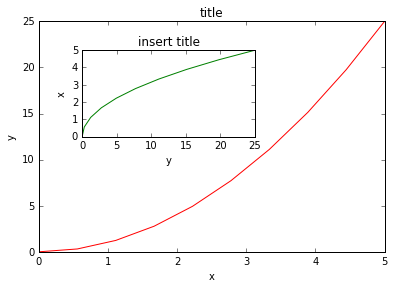

In [10]:
## Q4 code

If we don't care about being explicit about where our plot axes are placed in the figure canvas, then we can use one of the many axis layout managers in matplotlib. My favorite is `subplots`, which can be used like this:

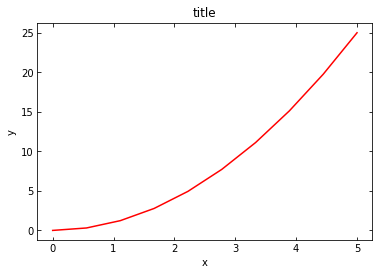

In [29]:
plt.plot(x,y,'r')
plt.title('title')
plt.xlabel('x')
plt.ylabel('y')
plt.tick_params(top='on',right='on',which='both',direction='in')

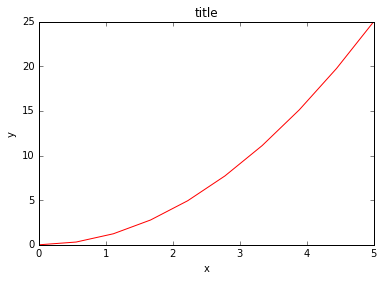

In [11]:
## Q5 code

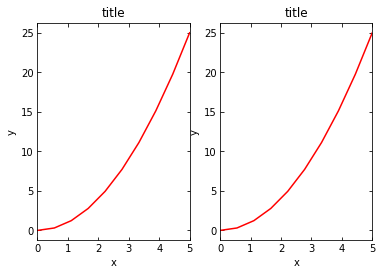

In [30]:
fig,ax=plt.subplots(nrows=1,ncols=2)
ax[0].plot(x,y,'r')
ax[0].set_xlim(0,5)
ax[0].set_title('title')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].tick_params(top='on',right='on',which='both',direction='in')
ax[1].plot(x,y,'r')
ax[1].set_xlim(0,5)
ax[1].set_title('title')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].tick_params(top='on',right='on',which='both',direction='in')

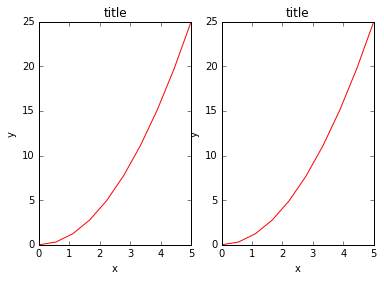

In [12]:
## Q6 code

That was easy, but it isn't so pretty with overlapping figure axes and labels, right?

We can deal with that by using the `fig.tight_layout` method, which automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content:

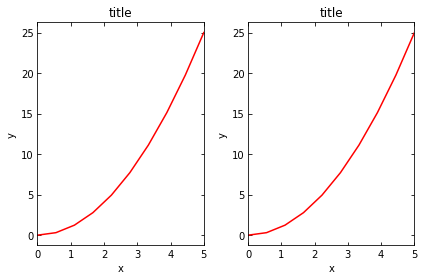

In [31]:
fig,ax=plt.subplots(nrows=1,ncols=2,tight_layout=True)
ax[0].plot(x,y,'r')
ax[0].set_xlim(0,5)
ax[0].set_title('title')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].tick_params(top='on',right='on',which='both',direction='in')
ax[1].plot(x,y,'r')
ax[1].set_xlim(0,5)
ax[1].set_title('title')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].tick_params(top='on',right='on',which='both',direction='in')

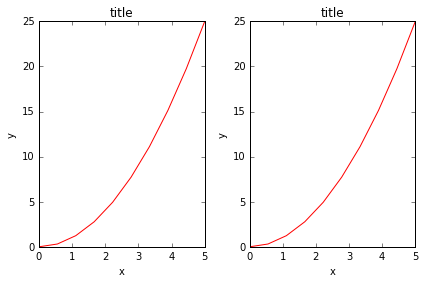

In [13]:
## Q7 code

### Saving figures

To save a figure to a file we can use the `savefig` method in the `Figure` class:

In [16]:
## Q8 code

In [12]:
fig.savefig('tupian.png')

#### What formats are available and which ones should be used for best quality?

Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF. For scientific papers, I recommend using PDF whenever possible. (LaTeX documents compiled with `pdflatex` can include PDFs using the `includegraphics` command). In some cases, PGF can also be good alternative.

### Legends, labels and titles

Now that we have covered the basics of how to create a figure canvas and add axes instances to the canvas, let's look at how decorate a figure with titles, axis labels, and legends.

**Figure titles**

A title can be added to each axis instance in a figure. To set the title, use the `set_title` method in the axes instance:

**Axis labels**

Similarly, with the methods `set_xlabel` and `set_ylabel`, we can set the labels of the X and Y axes:

In [38]:
ax[0].set_title('title')
ax[1].set_title('title')

Text(0.5, 1, 'title')

In [39]:
ax[0].set_xlabel("x")
ax[1].set_ylabel("y")

Text(227.79999999999998, 0.5, 'y')

**Legends**

Legends for curves in a figure can be added in two ways. One method is to use the `legend` method of the axis object and pass a list/tuple of legend texts for the previously defined curves:

In [42]:
ax[0].legend(["curve1", "curve2", "curve3"])
ax[1].legend(["curve1", "curve2", "curve3"])

The method described above follows the MATLAB API. It is somewhat prone to errors and unflexible if curves are added to or removed from the figure (resulting in a wrongly labelled curve).

A better method is to use the `label="label text"` keyword argument when plots or other objects are added to the figure, and then using the `legend` method without arguments to add the legend to the figure: 

In [45]:
ax[1].plot(x, x**2, label="curve1")
ax[1].plot(x, x**3, label="curve2")
ax[1].legend()

In [44]:
ax[0].plot(x, x**2, label="curve1")
ax[0].plot(x, x**3, label="curve2")
ax[0].legend()

The advantage with this method is that if curves are added or removed from the figure, the legend is automatically updated accordingly.

The `legend` function takes an optional keyword argument `loc` that can be used to specify where in the figure the legend is to be drawn. The allowed values of `loc` are numerical codes for the various places the legend can be drawn. See http://matplotlib.org/users/legend_guide.html#legend-location for details. Some of the most common `loc` values are:

In [ ]:
ax.legend(loc=0) # let matplotlib decide the optimal location
ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner
# .. many more options are available

The following figure shows how to use the figure title, axis labels and legends described above:

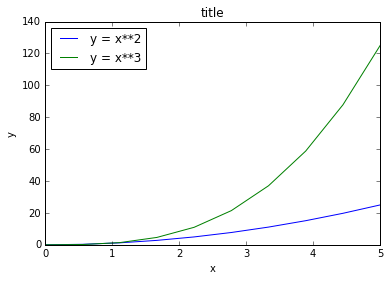

In [23]:
## Q9 code

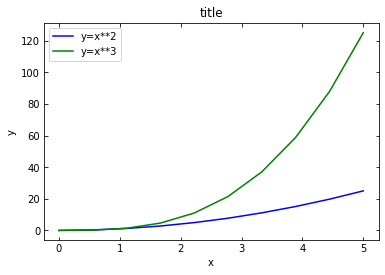

In [49]:
plt.plot(x,x**2,'b',label='y=x**2')
plt.plot(x,x**3,'g',label='y=x**3')
plt.title('title')
plt.xlabel('x')
plt.ylabel('y')
plt.tick_params(top='on',right='on',which='both',direction='in')
plt.legend()

### Setting colors, linewidths, linetypes

#### Colors

With matplotlib, we can define the colors of lines and other graphical elements in a number of ways. First of all, we can use the MATLAB-like syntax where `'b'` means blue, `'g'` means green, etc. The MATLAB API for selecting line styles are also supported: where, for example, 'b.-' means a blue line with dots:

In [32]:
# MATLAB style line color and style 
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--') # green dashed line

We can also define colors by their names or RGB hex codes and optionally provide an alpha value using the `color` and `alpha` keyword arguments:

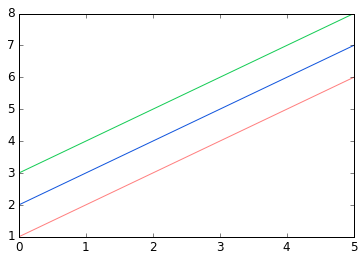

In [33]:
## Q10 code


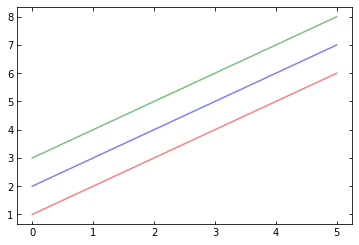

In [51]:
fig,ax=plt.subplots()
ax.plot(x,x+1,color='red',alpha=0.5)
ax.plot(x,x+2,color='blue',alpha=0.5)
ax.plot(x,x+3,color='green',alpha=0.5)
ax.tick_params(top='on',right='on',which='both',direction='in')

#### Line and marker styles

To change the line width, we can use the `linewidth` or `lw` keyword argument. The line style can be selected using the `linestyle` or `ls` keyword arguments:

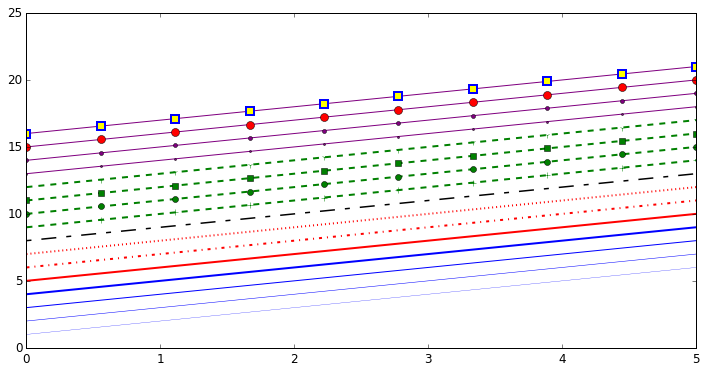

In [34]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

### Control over axis appearance

The appearance of the axes is an important aspect of a figure that we often need to modify to make a publication quality graphics. We need to be able to control where the ticks and labels are placed, modify the font size and possibly the labels used on the axes. In this section we will look at controling those properties in a matplotlib figure.

#### Plot range

The first thing we might want to configure is the ranges of the axes. We can do this using the `set_ylim` and `set_xlim` methods in the axis object, or `axis('tight')` for automatrically getting "tightly fitted" axes ranges:

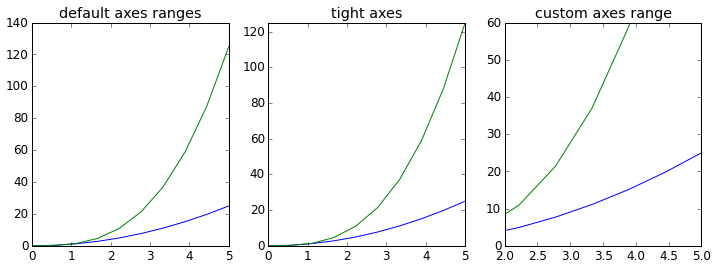

In [35]:
## Q11 code

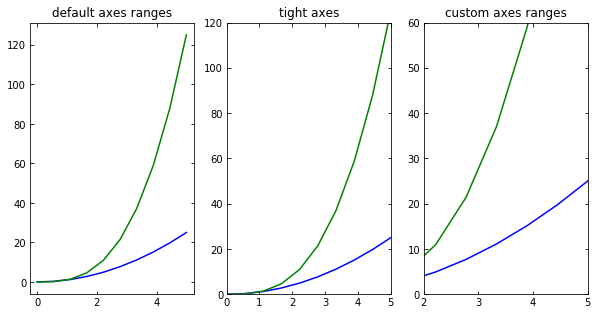

In [58]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(10,5))
ax[0].plot(x,x**2,'b',label='y=x**2')
ax[0].plot(x,x**3,'g',label='y=x**3')
ax[0].set_title('default axes ranges')
ax[0].tick_params(top='on',right='on',which='both',direction='in')
ax[1].plot(x,x**2,'b',label='y=x**2')
ax[1].plot(x,x**3,'g',label='y=x**3')
ax[1].set_title('tight axes')
ax[1].set_xlim(0,5)
ax[1].set_ylim(0,120)
ax[1].tick_params(top='on',right='on',which='both',direction='in')
ax[2].plot(x,x**2,'b',label='y=x**2')
ax[2].plot(x,x**3,'g',label='y=x**3')
ax[2].set_title('custom axes ranges')
ax[2].set_xlim(2,5)
ax[2].set_ylim(0,60)
ax[2].tick_params(top='on',right='on',which='both',direction='in')

#### Logarithmic scale

It is also possible to set a logarithmic scale for one or both axes. This functionality is in fact only one application of a more general transformation system in Matplotlib. Each of the axes' scales are set seperately using `set_xscale` and `set_yscale` methods which accept one parameter (with the value "log" in this case):

#### Scientific notation

With large numbers on axes, it is often better use scientific notation:

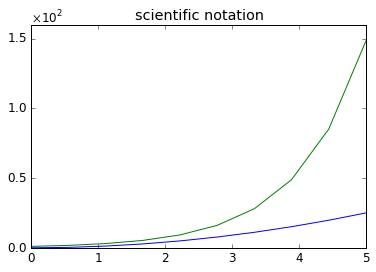

In [38]:
## Q12 code 

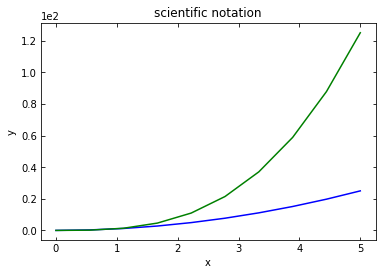

In [59]:
plt.plot(x,x**2,'b')
plt.plot(x,x**3,'g')
plt.title('scientific notation')
plt.xlabel('x')
plt.ylabel('y')
plt.tick_params(top='on',right='on',which='both',direction='in')
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))

### Axis grid

With the `grid` method in the axis object, we can turn on and off grid lines. We can also customize the appearance of the grid lines using the same keyword arguments as the `plot` function:

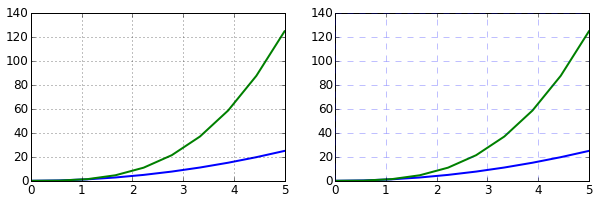

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# custom grid appearance
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

### Axes where x and y is zero

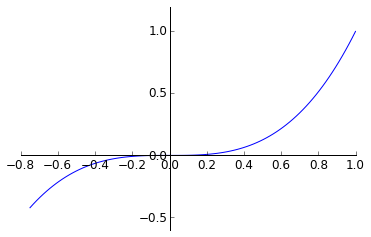

In [45]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);

### Other 2D plot styles

In addition to the regular `plot` method, there are a number of other functions for generating different kind of plots. See the matplotlib plot gallery for a complete list of available plot types: http://matplotlib.org/gallery.html. Some of the more useful ones are show below:

In [46]:
n = np.array([0,1,2,3,4,5])

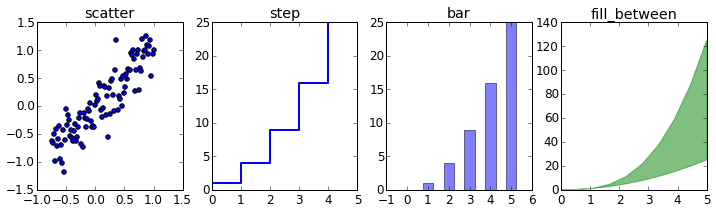

In [47]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

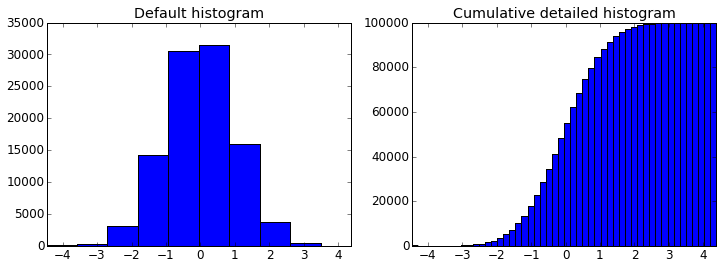

In [49]:
# A histogram
n = np.random.randn(100000)
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(n)
axes[0].set_title("Default histogram")
axes[0].set_xlim((min(n), max(n)))

axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title("Cumulative detailed histogram")
axes[1].set_xlim((min(n), max(n)));

## Further reading

* http://www.matplotlib.org - The project web page for matplotlib.
* https://github.com/matplotlib/matplotlib - The source code for matplotlib.
* http://matplotlib.org/gallery.html - A large gallery showcaseing various types of plots matplotlib can create. Highly recommended! 
* http://www.loria.fr/~rougier/teaching/matplotlib - A good matplotlib tutorial.
* http://scipy-lectures.github.io/matplotlib/matplotlib.html - Another good matplotlib reference.


## Versions

In [1]:
%reload_ext version_information
%version_information numpy, scipy, matplotlib

Software versions
Python 2.7.10 64bit [GCC 4.2.1 (Apple Inc. build 5577)]
IPython 3.2.1
OS Darwin 14.1.0 x86_64 i386 64bit
numpy 1.9.2
scipy 0.16.0
matplotlib 1.4.3
Sat Aug 15 11:30:23 2015 JST